C:\Users\nvela\AppData\Local\Temp\ipykernel_24500\2230534690.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df.fillna(method='ffill', inplace=True)


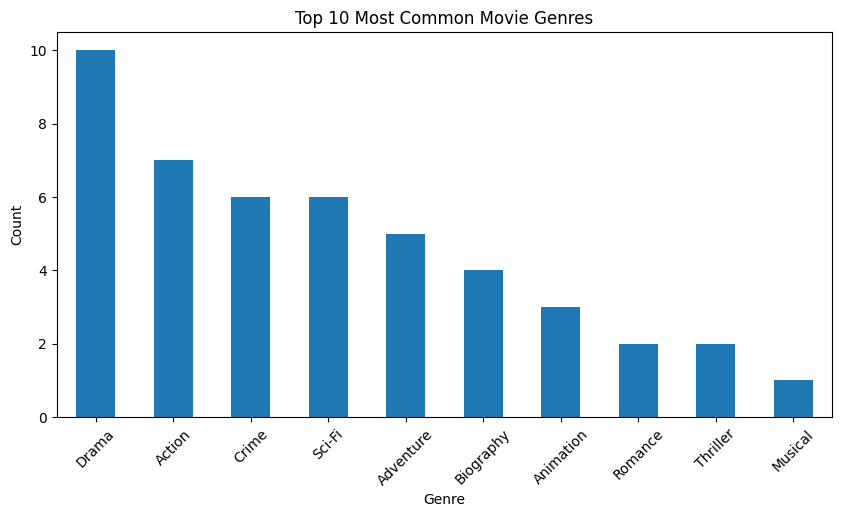

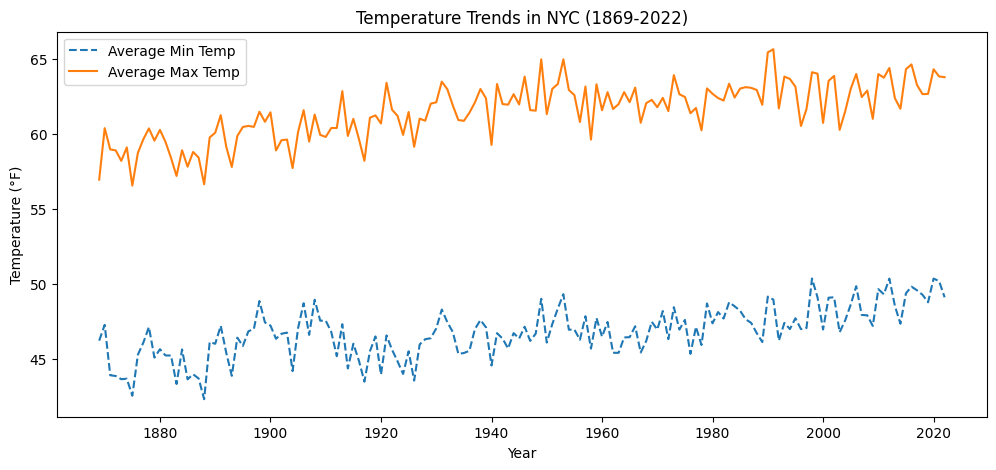

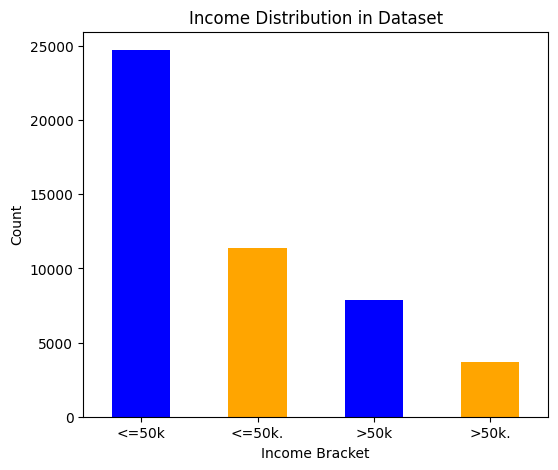

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
movies_df = pd.read_csv("movies_list.csv")
weather_df = pd.read_csv("NYC_Central_Park_weather_1869-2022.csv")
income_df = pd.read_csv("adult_income_dataset_uci_machine_learning_repo.csv")

# Cleaning and Tidying
movies_df.drop_duplicates(inplace=True)
movies_df.dropna(inplace=True)
movies_df['Year'] = movies_df['Year'].astype(int)

weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])
weather_df.fillna(method='ffill', inplace=True)
weather_df['Year'] = weather_df['DATE'].dt.year

income_df.columns = income_df.columns.str.strip()
income_df.dropna(inplace=True)
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for col in categorical_cols:
    income_df[col] = income_df[col].str.lower()

# Movies Dataset Analysis
top_genres = movies_df['Genre'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_genres.plot(kind='bar')
plt.title("Top 10 Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Weather Dataset Analysis
avg_temp_by_year = weather_df.groupby('Year')[['TMIN', 'TMAX']].mean()
plt.figure(figsize=(12,5))
plt.plot(avg_temp_by_year.index, avg_temp_by_year['TMIN'], label="Average Min Temp", linestyle='dashed')
plt.plot(avg_temp_by_year.index, avg_temp_by_year['TMAX'], label="Average Max Temp")
plt.title("Temperature Trends in NYC (1869-2022)")
plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.legend()
plt.show()

# Income Dataset Analysis
income_distribution = income_df['income'].value_counts()
plt.figure(figsize=(6,5))
income_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title("Income Distribution in Dataset")
plt.xlabel("Income Bracket")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
'''
Movies Dataset – The bar chart shows the most common movie genres, with Drama, Crime, and Action appearing frequently.
Weather Dataset – The line graph illustrates temperature trends in NYC from 1869 to 2022.
There's a noticeable increase in average max and min temperatures, suggesting climate warming.
Income Dataset – The bar chart indicates that the majority of individuals fall in the ≤50K income bracket, reflecting an income disparity in the dataset.